# Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months. 

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [4]:
#load dataset
data=pd.read_csv('fitness_class.csv')
data.head()

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     765 non-null    object 
 1   time            765 non-null    object 
 2   class_category  765 non-null    object 
 3   class_capacity  765 non-null    int64  
 4   days_before     765 non-null    int64  
 5   attendance      765 non-null    int64  
 6   age             765 non-null    float64
 7   new_students    765 non-null    int64  
 8   over_6_month    765 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 53.9+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
class_capacity,765.0,17.542484,4.365481,15.0,15.0,15.0,25.0,26.0
days_before,765.0,2.547712,1.355379,1.0,1.0,2.0,4.0,5.0
attendance,765.0,9.563399,3.896598,4.0,7.0,9.0,11.0,21.0
age,765.0,29.092680,5.912063,8.3,25.3,29.0,33.2,48.8
new_students,765.0,5.917647,1.789224,1.0,5.0,6.0,7.0,11.0
over_6_month,765.0,7.577778,1.974518,2.0,6.0,8.0,9.0,13.0


<AxesSubplot:xlabel='attendance', ylabel='Count'>

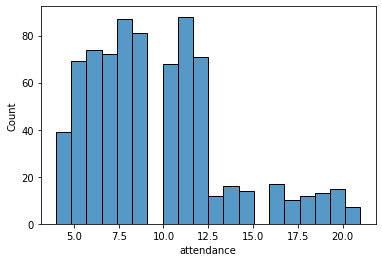

In [7]:
sns.histplot(data['attendance'])

<AxesSubplot:xlabel='class_category', ylabel='attendance'>

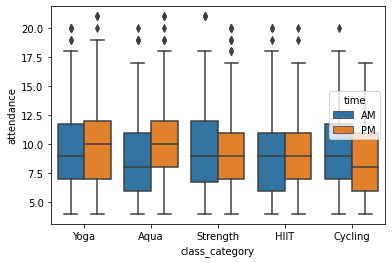

In [8]:
sns.boxplot(y='attendance',x='class_category',data=data,hue='time')

<AxesSubplot:xlabel='day_of_week', ylabel='attendance'>

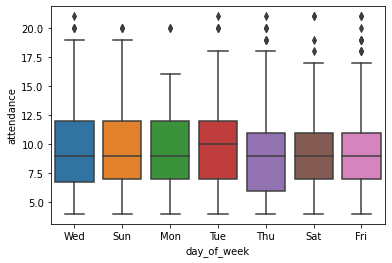

In [9]:
sns.boxplot(y='attendance',x='day_of_week',data=data)

<AxesSubplot:xlabel='day_of_week', ylabel='attendance'>

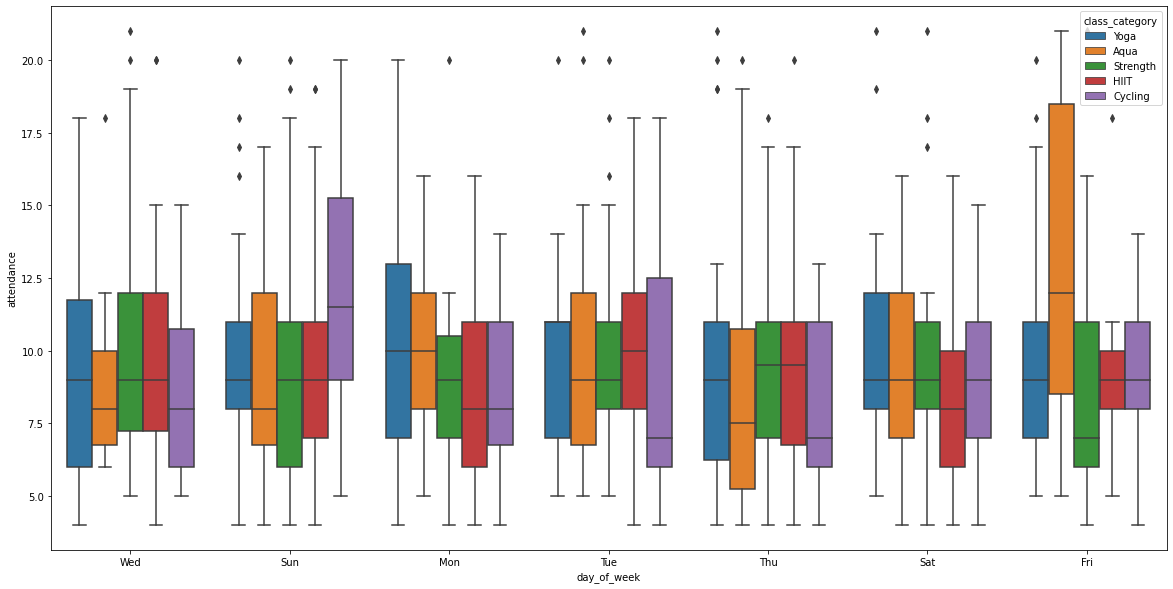

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(y='attendance',x='day_of_week',data=data,hue='class_category')

<Figure size 1440x1440 with 0 Axes>

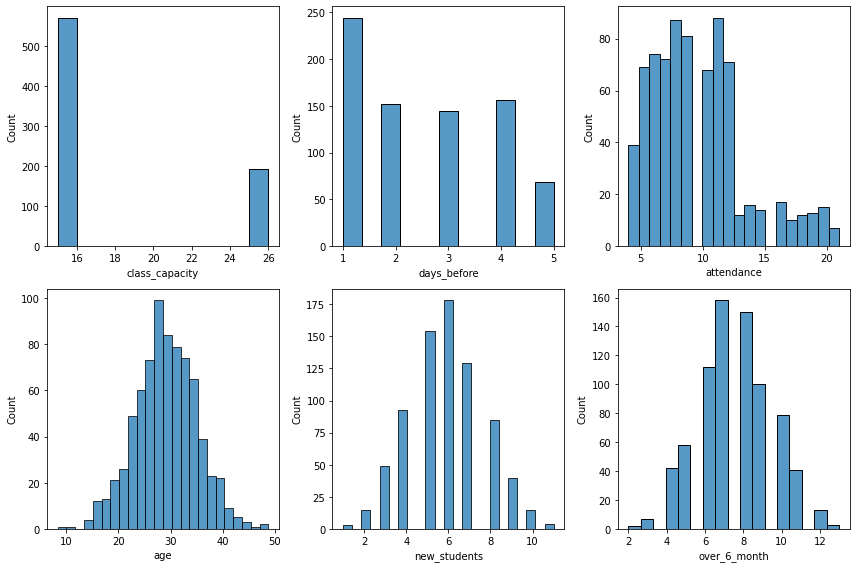

In [11]:
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(2,3,figsize=(12,8))
ax=ax.flatten()
for i,col in enumerate(data.select_dtypes(include=['int','float']).columns):
    sns.histplot(data=data,x=col,ax=ax[i])
plt.tight_layout()

<AxesSubplot:>

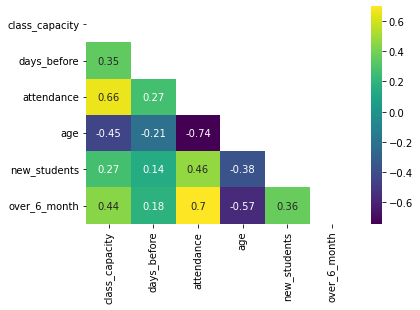

In [12]:

sns.heatmap(data.corr(),cmap='viridis',mask=np.triu(data.corr()),annot=True)

In [13]:
data=data[data['age']>=14]

In [14]:
data[data['class_capacity']>25]=25

In [15]:
data['class_capacity'].value_counts()

15    571
25    191
Name: class_capacity, dtype: int64

In [16]:
data['attendance_capacity_ratio']=round(data['attendance']/data['class_capacity'],2)
data['new_students_attendance_ratio']=round(data['new_students']/data['attendance'],2)
data['over6_attendance_ration']=round(data['over_6_month']/data['attendance'],2)

<AxesSubplot:>

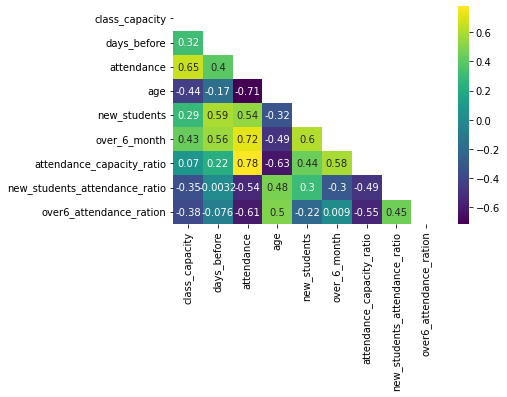

In [17]:
sns.heatmap(data.corr(),cmap='viridis',mask=np.triu(data.corr()),annot=True)

In [18]:
cat_feat=data.select_dtypes(include=['object']).columns

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
encoder=OrdinalEncoder()

In [21]:
data[cat_feat]=encoder.fit_transform(data[cat_feat].astype(str))


In [23]:
data.head()

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month,attendance_capacity_ratio,new_students_attendance_ratio,over6_attendance_ration
0,7.0,1.0,5.0,15,1,8,31.1,6,4,0.53,0.75,0.5
1,4.0,2.0,1.0,15,3,8,27.0,7,8,0.53,0.88,1.0
2,2.0,1.0,1.0,15,5,10,22.4,8,7,0.67,0.80,0.7
3,4.0,2.0,4.0,25,3,18,23.5,7,9,0.72,0.39,0.5
4,2.0,1.0,5.0,15,5,10,29.8,5,7,0.67,0.50,0.7


In [24]:
X=data.drop('attendance',axis=1)
y=data['attendance']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
models={'R':Ridge(alpha=0.1),
       'L':Lasso(alpha=0.1),
       'Linreg':LinearRegression(),
       'rfr':RandomForestRegressor(),
       'gbr':GradientBoostingRegressor()}

results={}
for name,model in models.items():
    cross=cross_val_score(model,X_train,y_train,cv=10,scoring='r2')
    results[name]=np.mean(cross)

In [27]:
for name,score in results.items():
    print('_______________')
    print(name,score)

_______________
R 0.9664709194105235
_______________
L 0.8916819281633739
_______________
Linreg 0.9665172798395393
_______________
rfr 0.9998223438177563
_______________
gbr 0.9999137809971319


In [28]:
RandomForest=RandomForestRegressor()
RandomForest.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
print('score of train data: ',RandomForest.score(X_train,y_train))
print('score of test data: ' ,RandomForest.score(X_test,y_test))

score of train data:  0.9999901645295077
score of test data:  0.9999823734564992


In [31]:
prediction=RandomForest.predict(X_test)

In [32]:
print('MAE:',mean_absolute_error(y_test,prediction))
print('MSE:',mean_squared_error(y_test,prediction,squared=False))

MAE: 0.0024836601307189534
MSE: 0.01695823396897227


In [33]:
pred_df=pd.DataFrame({'y_test':y_test,'prediction':prediction})
pred_df['prediction']=pred_df['prediction'].astype('int')

In [34]:
pred_df.head()

,y_test,prediction
199,4,4
263,10,10
39,8,8
452,5,5
598,12,12


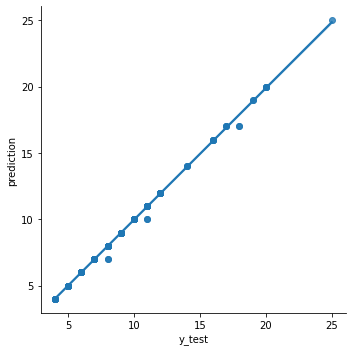

In [35]:
sns.lmplot(x='y_test',y='prediction',data=pred_df)